# PREDICTING PENGUIN CLASS FROM DEPLOYED MODEL

In this notebook, we predict the penguin spice based on their:
- island
- bill length
- bill depth
- flipped length
- body mass

We will use a Gradient Boosting algorithm that we have registered in MLFlow

#### Python imports

In [1]:
import requests
import pandas as pd
from pathlib import Path
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from VitalMetrics.config import PROCESSED_DATA_DIR, RAW_DATA_DIR
from VitalMetrics.features import feature_engineering

2024-10-02 23:34:54.602 | INFO     | VitalMetrics.config:<module>:10 - PROJ_ROOT path is: /usr/local/lib/python3.10/site-packages


#### Define parameters

In [2]:
# test_data_path = Path(PROCESSED_DATA_DIR /"penguin_test_features.csv")
test_data_path = Path("data/penguins_test.csv")
model_type = "Gradient Boosting"

## PREDICTIONS WITH DEPLOYED MODEL

### Retrieving the model

In [3]:
with open(Path("ML_artifacts/model.pkl"), "rb") as f:
    model = pickle.load(f)

### Opening test data

In [4]:
df = pd.read_csv(test_data_path)
df = feature_engineering(df)
features = df.drop(columns=["id", "species"]).values.tolist()
true_class = df.species.values

2024-10-02 23:34:57.332 | INFO     | VitalMetrics.features:feature_engineering:12 - Starting feature engineering...
2024-10-02 23:34:57.336 | INFO     | VitalMetrics.features:feature_engineering:31 - Applying label encoding on categorical features...
2024-10-02 23:34:57.344 | INFO     | VitalMetrics.features:feature_engineering:44 - Feature engineering completed.


In [6]:
penguin_predicted_species = model.predict(features)

2024-10-02 23:35:15.998 | INFO     | VitalMetrics.classifier:predict:65 - Making predictions on the test data...


### EVALUATE PREDICTIONS

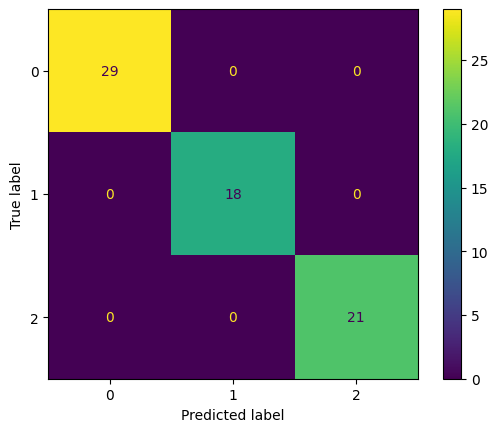

In [7]:
cm = confusion_matrix(true_class, penguin_predicted_species)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()